# student performance prediction project

In [1]:
# importing the dependecies

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import sklearn 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import StandardScaler

#

In [10]:
# loading the dataset

In [11]:
student = pd.read_csv("C:/Users/Harsha Vardhan/Downloads/Student_Performance.csv")

In [12]:
# exploring the dataset

In [13]:
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
student.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [15]:
student.shape

(10000, 6)

In [16]:
student.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [17]:
student.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [19]:
student.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [18]:
#visualization for detecting the outliers

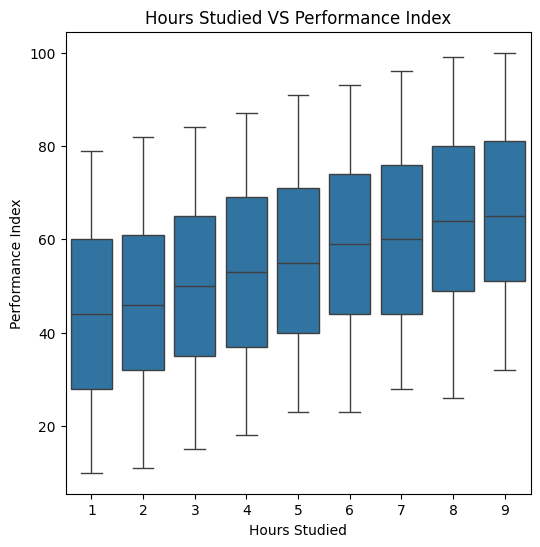

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(x ='Hours Studied',y='Performance Index',data=student)
plt.xlabel("Hours Studied")
plt.ylabel('Performance Index')
plt.title('Hours Studied VS Performance Index')
plt.show()

<Figure size 800x800 with 0 Axes>

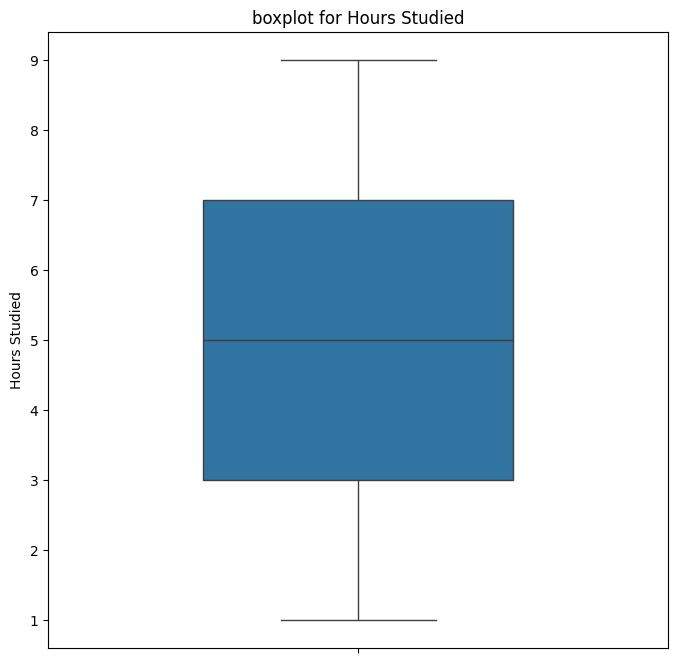

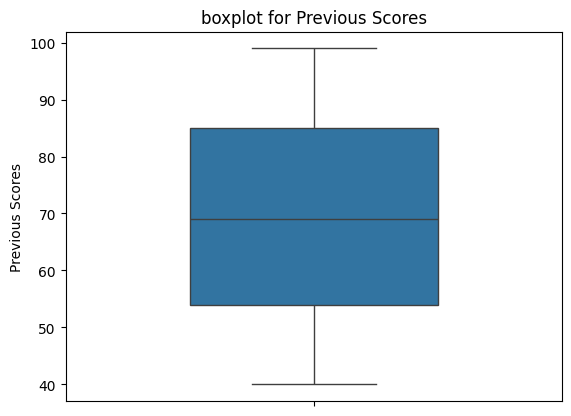

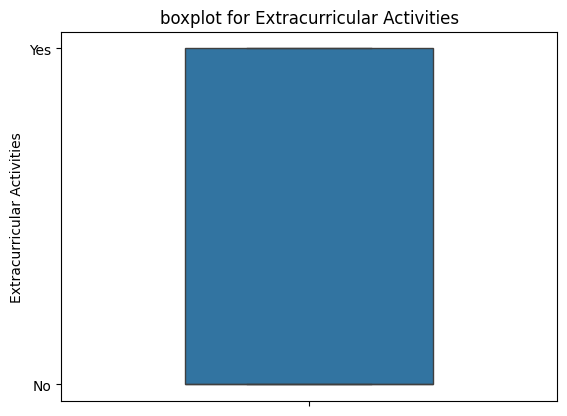

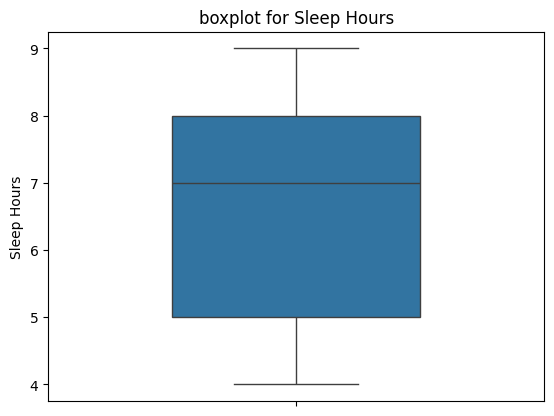

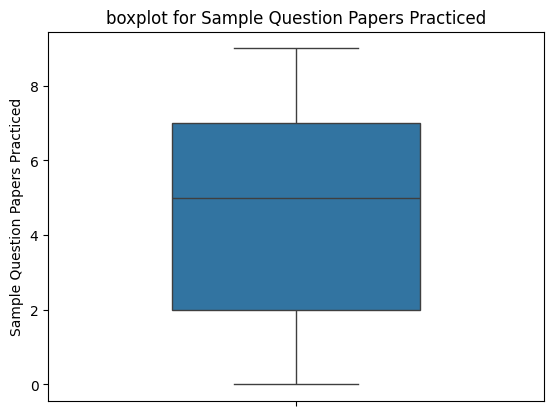

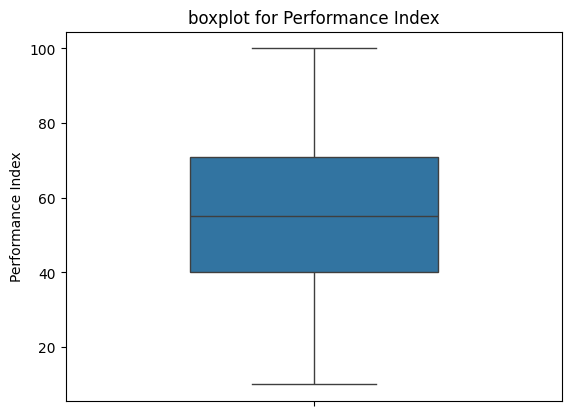

In [36]:

    plt.figure(figsize=(8,8))
    for col in student.columns:
        sns.boxplot(student[col],width=0.5)
        plt.title(f'boxplot for {col}')
        plt.show()
        

In [23]:
# to visualize the every column in dataset

<Figure size 500x600 with 0 Axes>

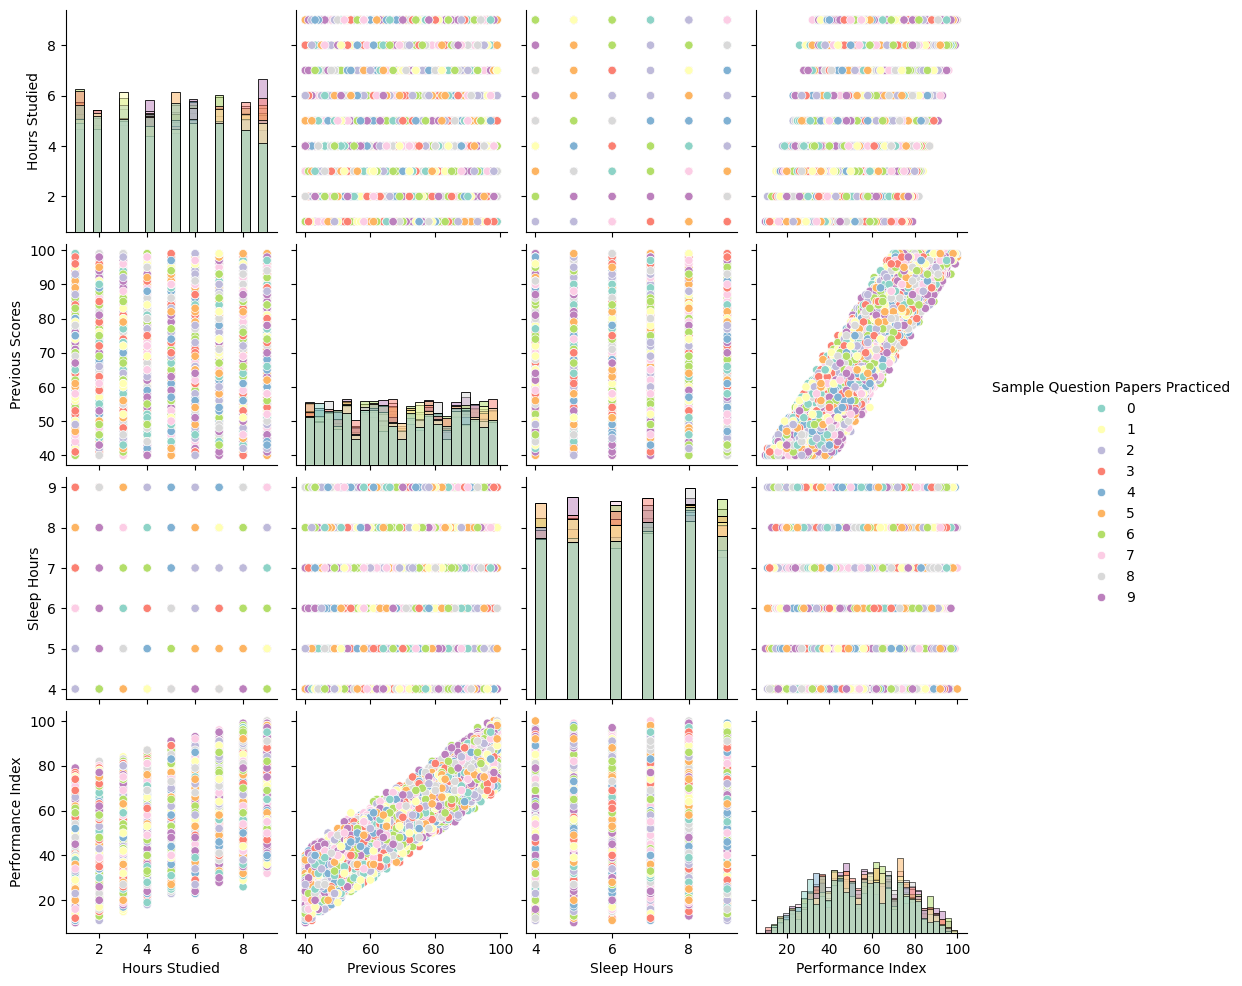

In [34]:
plt.figure(figsize=(5,6))
sns.pairplot(student, hue="Sample Question Papers Practiced",diag_kind="hist",palette="Set3")
plt.show()

In [37]:
# label encoding of Extracurricular Activities	

In [40]:
student["Extracurricular Activities"].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [41]:
encode ={
    "No":0,
    "Yes":1,
}

In [42]:
student["Extracurricular Activities"] = student["Extracurricular Activities"].map(encode)

In [43]:
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [46]:
# dividing the into two parts of target and feature columns

In [47]:
x = student.drop("Performance Index",axis=1)
y = student["Performance Index"]

In [48]:
#standardizing the data 

In [45]:
scaler = StandardScaler()

In [49]:
scaler.fit(x)


StandardScaler()

In [50]:
x=scaler.fit_transform(x)

In [51]:
x

array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394]])

In [52]:
# splitting the data


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [54]:
x_train.shape

(8000, 5)

In [55]:
x_test.shape

(2000, 5)

In [56]:
y_train.shape

(8000,)

In [57]:
y_test.shape

(2000,)

In [58]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
import xgboost
from xgboost import XGBRegressor 

In [62]:
from sklearn.metrics import r2_score

In [63]:
models = [LogisticRegression(),Lasso(),SVR(),GradientBoostingRegressor(),XGBRegressor()]

In [64]:
def model_selection():
    for m in models:
        m.fit(x_train,y_train)
        y_pred=m.predict(x_test)
        print("model:"," ",m,r2_score(y_test,y_pred))
        plt.scatter(y_test,y_pred,s=10,marker='*',label=m)
model_selection()

model:   LogisticRegression() 0.9651783392584165
model:   Lasso() 0.9803896035217287
model:   SVR() 0.9855526182458189
model:   GradientBoostingRegressor() 0.9878883311439483
model:   XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 0.9866318542700118


In [68]:
new_model = SVR(kernel='linear')

In [69]:
new_model.fit(x_train,y_train)

SVR(kernel='linear')

In [88]:
new_model.score(x_test,y_test)

0.9886258601792014

In [71]:
pred=new_model.predict(x_test)

In [75]:
pred

array([74.80652877, 61.53932086, 15.09853291, ..., 26.56783809,
       63.30160645, 35.36074329])

In [89]:
from sklearn.metrics import r2_score,mean_squared_error

In [90]:
print("r2_score value:" ,r2_score(y_test,pred))

r2_score value: 0.9886258601792014


In [92]:
print("mean_squared_error_value:",mean_squared_error(y_test,pred))

mean_squared_error_value: 4.233088309645502
